In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from scipy import stats

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

### This uses factor_pricing.py, which you do not have.
### Thus, this notebook is just for demonstration.

In [3]:
import sys
sys.path.insert(0, '../cmds')
sys.path.insert(0, '../DEV')
from portfolio import *
from factor_pricing import *

# Load Data

In [4]:
filepath_data = '../data/dfa_analysis_data.xlsx'
info = pd.read_excel(filepath_data,sheet_name='descriptions')
info.rename(columns={'Unnamed: 0':'Symbol'},inplace=True)
info.set_index('Symbol',inplace=True)

facs = pd.read_excel(filepath_data,sheet_name='factors')
facs.set_index('Date',inplace=True)
rf = facs['RF'].copy()
facs.drop(columns=['RF'],inplace=True)

# 2. Factors

## 2.1

In [5]:
dts = dict()
dts['early'] = pd.date_range(start=facs.index[0], end='31/12/1980',freq='M')
dts['founding'] = pd.date_range(start='1/1/1981', end='31/12/2001',freq='M')
dts['recent'] = pd.date_range(start='1/1/2002', end=facs.index[-1],freq='M')

dts['1990s'] = pd.date_range(start='1/1/1991', end='31/12/1999',freq='M')
dts['modern'] = dts['founding'].union(dts['recent'])
dts['all'] = facs.index

/Users/markhendricks/Projects/FINM/finm-portfolio-2022/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: UserWarning: Parsing '31/12/1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/markhendricks/Projects/FINM/finm-portfolio-2022/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: UserWarning: Parsing '31/12/2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/markhendricks/Projects/FINM/finm-portfolio-2022/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: UserWarning: Parsing '31/12/1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
for era in dts.keys():
    print(f'\n========================================================\n')
    print(f'Period: {dts[era][0]} to {dts[era][-1]}')
    print(f'\n========================================================')
    display(performanceMetrics(facs.loc[dts[era]],annualization=12).join(tailMetrics(facs.loc[dts[era]],quantile=.05)['VaR (0.05)']))



Period: 1926-07-31 00:00:00 to 1980-12-31 00:00:00



,Mean,Vol,Sharpe,Min,Max,VaR (0.05)
Mkt-RF,0.0811,0.2051,0.3957,-0.2913,0.3885,-0.0840
SMB,0.0340,0.1146,0.2966,-0.0986,0.3656,-0.0434
HML,0.0495,0.1338,0.3697,-0.1311,0.3561,-0.0429




Period: 1981-01-31 00:00:00 to 2001-12-31 00:00:00



,Mean,Vol,Sharpe,Min,Max,VaR (0.05)
Mkt-RF,0.0773,0.1574,0.4908,-0.2324,0.1247,-0.0645
SMB,-0.0009,0.1184,-0.0074,-0.1723,0.2142,-0.0466
HML,0.0637,0.1113,0.5727,-0.0970,0.1248,-0.0418




Period: 2002-01-31 00:00:00 to 2022-08-31 00:00:00



,Mean,Vol,Sharpe,Min,Max,VaR (0.05)
Mkt-RF,0.0833,0.1540,0.5409,-0.1723,0.1365,-0.0788
SMB,0.0196,0.0858,0.2288,-0.0594,0.0734,-0.0378
HML,0.0017,0.1045,0.0161,-0.1397,0.1275,-0.0410




Period: 1991-01-31 00:00:00 to 1999-12-31 00:00:00



,Mean,Vol,Sharpe,Min,Max,VaR (0.05)
Mkt-RF,0.1554,0.1300,1.1952,-0.1608,0.1084,-0.0418
SMB,0.0009,0.1052,0.0090,-0.0664,0.0846,-0.0504
HML,0.0123,0.0936,0.1318,-0.0832,0.0647,-0.0409




Period: 1981-01-31 00:00:00 to 2022-08-31 00:00:00



,Mean,Vol,Sharpe,Min,Max,VaR (0.05)
Mkt-RF,0.0802,0.1556,0.5159,-0.2324,0.1365,-0.0728
SMB,0.0093,0.1035,0.0898,-0.1723,0.2142,-0.0419
HML,0.0330,0.1082,0.3044,-0.1397,0.1275,-0.0413




Period: 1926-07-31 00:00:00 to 2022-08-31 00:00:00



,Mean,Vol,Sharpe,Min,Max,VaR (0.05)
Mkt-RF,0.0808,0.1852,0.4361,-0.2913,0.3885,-0.0796
SMB,0.0233,0.1099,0.2119,-0.1723,0.3656,-0.0420
HML,0.0423,0.1234,0.3430,-0.1397,0.3561,-0.0419


## 2.2
Regarding the factor premia, we see that...

* SMB premium is small in most subsamples and is negative during 1981-2001.

* HML is positive overall and in most subsamples, but it is negative in the post-case sample of 2002-2021.

* HML's premium drops substantially starting in the 1990's.

* MKT is positive in every subsample, and strongly so.

## 2.3

The correlations are low relative to most equity portfolios (which tend to have high correlations.)

* The correlation between MKT and SMB is relatively low, but definitely positive.

* The correlation between MKT and HML is negative since DFA's founding, but it was positive before that, such that the 100-year sample is positive.

MIN Correlation pair is ('SMB', 'HML')
MAX Correlation pair is ('SMB', 'Mkt-RF')


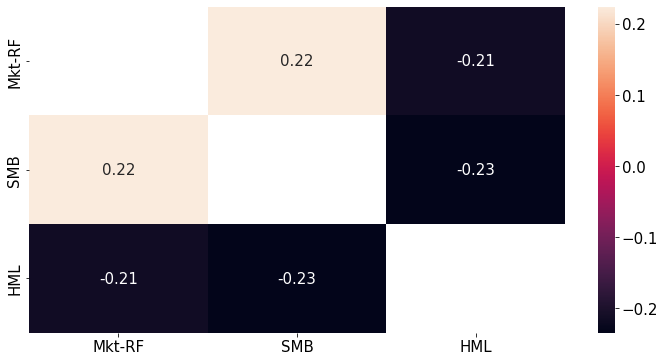

In [7]:
display_correlation(facs.loc[dts['modern']])

In [8]:
for era in dts.keys():
    print(f'\n========================================================\n')
    print(f'Period: {dts[era][0]} to {dts[era][-1]}')
    print(f'\n========================================================')
    display(facs.loc[dts[era]].corr())



Period: 1926-07-31 00:00:00 to 1980-12-31 00:00:00



,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.3663,0.4378
SMB,0.3663,1.0000,0.3091
HML,0.4378,0.3091,1.0000




Period: 1981-01-31 00:00:00 to 2001-12-31 00:00:00



,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.1643,-0.5268
SMB,0.1643,1.0000,-0.4548
HML,-0.5268,-0.4548,1.0000




Period: 2002-01-31 00:00:00 to 2022-08-31 00:00:00



,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.3162,0.1317
SMB,0.3162,1.0000,0.0929
HML,0.1317,0.0929,1.0000




Period: 1991-01-31 00:00:00 to 1999-12-31 00:00:00



,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.1316,-0.4498
SMB,0.1316,1.0000,-0.3305
HML,-0.4498,-0.3305,1.0000




Period: 1981-01-31 00:00:00 to 2022-08-31 00:00:00



,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.2243,-0.2138
SMB,0.2243,1.0000,-0.2348
HML,-0.2138,-0.2348,1.0000




Period: 1926-07-31 00:00:00 to 2022-08-31 00:00:00



,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.3163,0.2297
SMB,0.3163,1.0000,0.1147
HML,0.2297,0.1147,1.0000


## 2.4

<AxesSubplot:>

<AxesSubplot:>

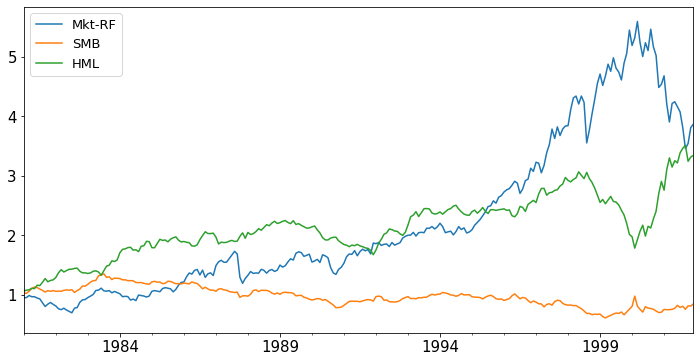

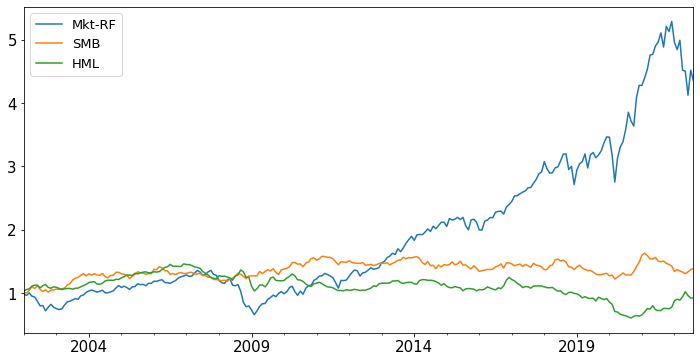

In [9]:
display((1+facs.loc[dts['founding']]).cumprod().plot());
display((1+facs.loc[dts['recent']]).cumprod().plot());

* The plots above show that HML had high returns in the era of the case: 1981-2001.

* In the post-case period (2002-2021) HML has a negative mean return. Nonetheless, it may be valuable given that it has negative correlation to MKT during this time.

* However, SMB has small or negative returns in this period while being positively correlated to MKT. Thus, it may be reasonable to drop SMB.

## Tangency Weights of Factors

Another way to consider whether all three factors matter is to remember that if a factor prices, then by the Fundamental Theorem of Asset Pricing it must be part of the tangency portfolio.

Calculate the tangency portfolio formed by the factors. Do they all get substantial weight?
We see that SMB has very little weight in the three-factor Tangency portfolio.

Thus, we again see that SMB may be unnecessary.

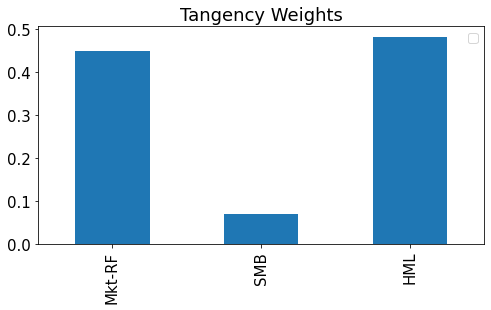

In [10]:
fig = plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,1,1)
tangency_weights(facs.loc[dts['modern']]).plot.bar(ax=ax1,title='Tangency Weights');
plt.legend([]);

# 3. CAPM

## 3.1

In [11]:
# load data
rets = pd.read_excel(filepath_data,sheet_name='portfolios (total returns)')
rets.set_index('Date',inplace=True)

In [12]:
# excess portfolio returns
retsx = rets.subtract(rf,axis=0)
# subsample of modern
facsT = facs.loc[dts['modern']]
retsxT = retsx.loc[dts['modern']]

In [13]:
mets = performanceMetrics(retsxT,annualization=12)
tail = tailMetrics(retsxT)

display(mets.join(tail['VaR (0.05)']))

,Mean,Vol,Sharpe,Min,Max,VaR (0.05)
SMALL LoBM,0.0105,0.2724,0.0384,-0.3499,0.3734,-0.1165
ME1 BM2,0.0957,0.2359,0.4058,-0.3143,0.4232,-0.0976
ME1 BM3,0.0929,0.1972,0.4711,-0.2970,0.2133,-0.0864
ME1 BM4,0.1200,0.1914,0.6270,-0.2934,0.2583,-0.0752
SMALL HiBM,0.1321,0.2077,0.6361,-0.2931,0.4150,-0.0883
ME2 BM1,0.0603,0.2457,0.2453,-0.3323,0.2773,-0.1046
ME2 BM2,0.1006,0.2032,0.4953,-0.3254,0.1926,-0.0840
ME2 BM3,0.1066,0.1831,0.5824,-0.2914,0.1742,-0.0787
ME2 BM4,0.1077,0.1792,0.6012,-0.2526,0.1880,-0.0764
ME2 BM5,0.1181,0.2120,0.5571,-0.3238,0.2630,-0.0942


## Explaining premia by risk metrics

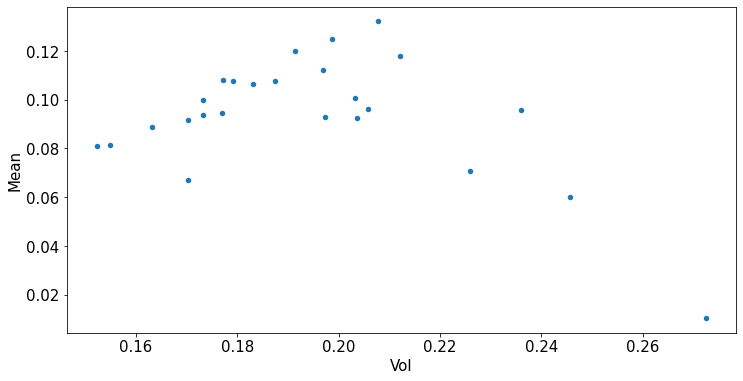

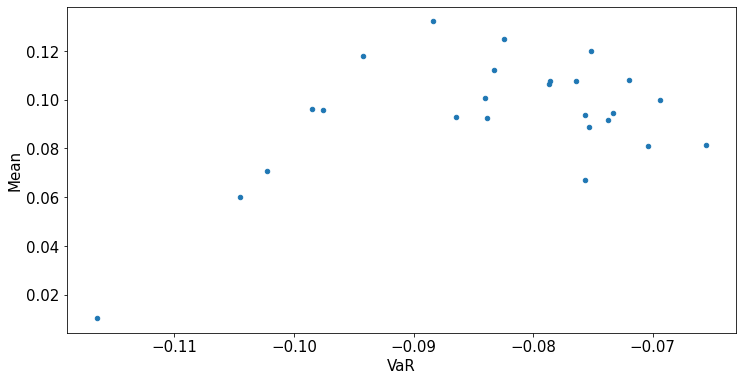

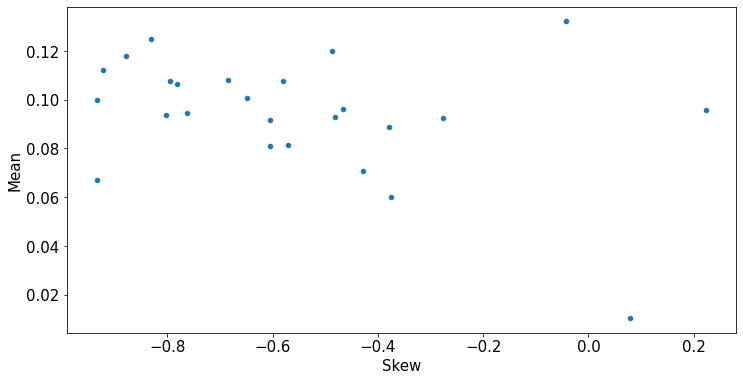

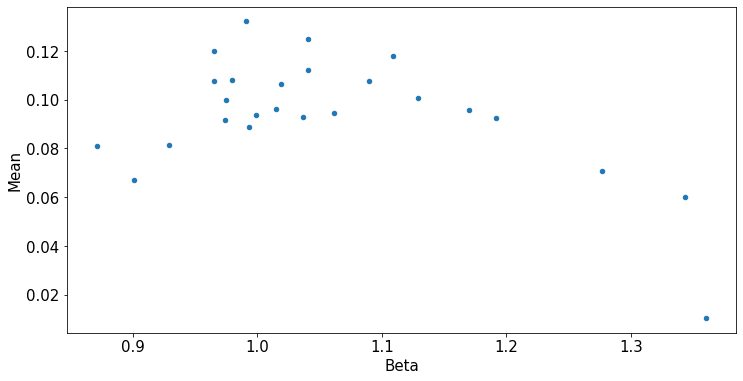

In [14]:
lfd = get_ols_metrics(facsT['Mkt-RF'],retsxT,annualization=12)

mets['Beta'] = lfd[['Mkt-RF']]
mets['VaR'] = tail[['VaR (0.05)']]
mets['Skew'] = tail[['Skewness']]

mets.plot.scatter(x='Vol',y='Mean');
mets.plot.scatter(x='VaR',y='Mean');
mets.plot.scatter(x='Skew',y='Mean');
mets.plot.scatter(x='Beta',y='Mean');

## 3.2 CAPM Tests: Time-Series Metrics

In [15]:
display(lfd)

,alpha,Mkt-RF,r-squared,Treynor Ratio,Info Ratio
SMALL LoBM,-0.0987,1.3600,0.6031,0.0077,-0.5750
ME1 BM2,0.0018,1.1702,0.5954,0.0818,0.0122
ME1 BM3,0.0097,1.0365,0.6684,0.0896,0.0857
ME1 BM4,0.0425,0.9652,0.6155,0.1243,0.3585
SMALL HiBM,0.0526,0.9907,0.5506,0.1333,0.3778
ME2 BM1,-0.0475,1.3433,0.7233,0.0449,-0.3677
ME2 BM2,0.0101,1.1286,0.7468,0.0892,0.0984
ME2 BM3,0.0248,1.0193,0.7502,0.1046,0.2712
ME2 BM4,0.0303,0.9654,0.7021,0.1116,0.3094
ME2 BM5,0.0292,1.1086,0.6613,0.1066,0.2363


If CAPM were true, then we would have the following implications:

* Treynor ratio would be the same for every asset, and it would equal the MKT premium.

* The alphas would all be zero

* The Information Ratios would all be zero


## 3.3 Cross-Sectional Test: Yes Intercept

Time-Series Test Plots


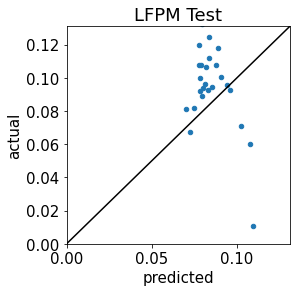

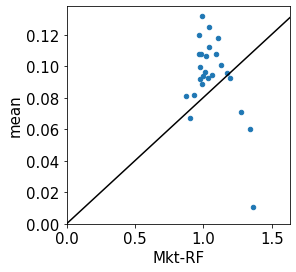

Cross-Sectional Test Plots


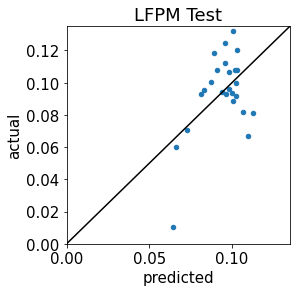

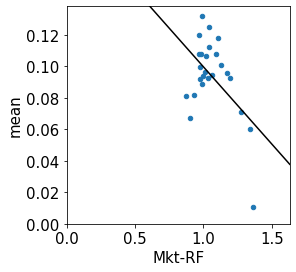


ESTIMATES


,premium-TS,premium-CS
Mkt-RF,0.0802,-0.0982
intercept,NaN,0.1980



MODEL FIT


,MAE-TS,MAE-CS,rsquared
error,0.0243,0.0158,0.2582



STATISTICAL SIGNIFICANCE


time-series,priced,premium
p-values,,
Mkt-RF,0.0009,0.0005
error,0.0000,NaN


"premium" p-value is the usual t-stat on the time-series factor mean.
"priced" p-value of factor is the t-stat of forming the tangency portfolio.
"priced" p-value of "error" is the joint-chi-squared test of the time-series alphas


In [16]:
LFPtests(retsxT,facsT[['Mkt-RF']],annualization=12,useIntCS=True)

## 3.4 

These results support the idea that the MKT premium is not sufficient for explaining all premia in the market.

Given that MKT cannot explain these assets, which are sorted by size and value, it is suggestive that there may be premia in size and value. 

But while we have ruled out MKT as being the only determinant factor, we have not proven size and value matter.

# 4.1 Fama-French 3-Factor Tests
## Time-Series Test
## Cross-Sectional Test: YES Intercept

Time-Series Test Plots


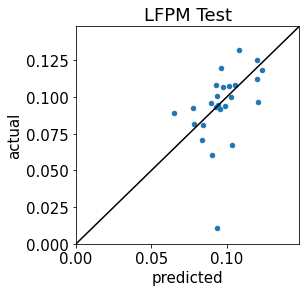

Cross-Sectional Test Plots


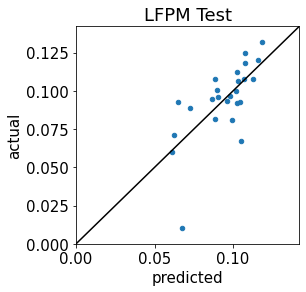


ESTIMATES


,premium-TS,premium-CS
HML,0.0330,0.0362
Mkt-RF,0.0802,-0.0957
SMB,0.0093,0.0029
intercept,NaN,0.1797



MODEL FIT


,MAE-TS,MAE-CS,rsquared
error,0.0142,0.0124,0.4665



STATISTICAL SIGNIFICANCE


time-series,priced,premium
p-values,,
Mkt-RF,0.0003,0.0005
SMB,0.7145,0.2811
HML,0.0067,0.0250
error,0.0000,NaN


"premium" p-value is the usual t-stat on the time-series factor mean.
"priced" p-value of factor is the t-stat of forming the tangency portfolio.
"priced" p-value of "error" is the joint-chi-squared test of the time-series alphas


In [17]:
LFPtests(retsxT,facsT,annualization=12,useIntCS=True)

# 4.2 Tangency Tests
## Time-Series Test
## Cross-Sectional Test: Yes Intercept

Time-Series Test Plots


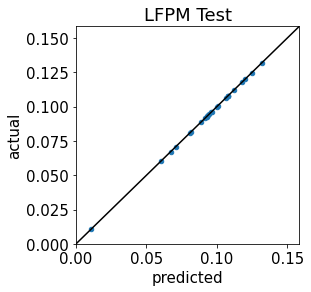

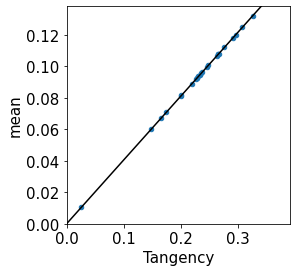

Cross-Sectional Test Plots


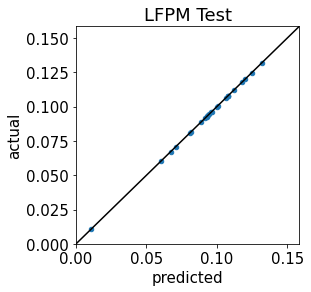

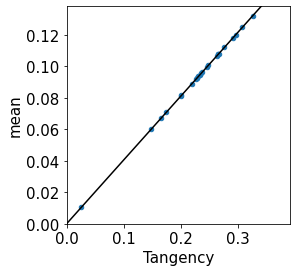


ESTIMATES


,premium-TS,premium-CS
Tangency,0.4046,0.4046
intercept,NaN,-0.0000



MODEL FIT


,MAE-TS,MAE-CS,rsquared
error,0.0000,0.0000,1.0000



STATISTICAL SIGNIFICANCE


time-series,priced,premium
p-values,,
Tangency,0.0000,0.0000
error,1.0000,NaN


"premium" p-value is the usual t-stat on the time-series factor mean.
"priced" p-value of factor is the t-stat of forming the tangency portfolio.
"priced" p-value of "error" is the joint-chi-squared test of the time-series alphas


In [18]:
tangency = retsxT @ tangency_weights(retsxT)
tangency.columns= ['Tangency']

LFPtests(retsxT,tangency,annualization=12,useIntCS=True)

## 4.3 

### The MAE 
is shown in the tables above labeled as MODEL FIT.

### Joint Test of Alphas

These test stats can be found in the tables above labeled as "STATISTICAL SIGNIFICANCE" in the "error","priced" cell of the table.

We note that the p-value for CAPM is 0 to many decimal places. 

So is the p-value for Fama-French 3 Factor.

However, the p-value for the Tangency factor is 1, meaning that its errors are certainly not significant--because they are 0 to machine precision.

### Stricter test

Checking individual alphas for significance via a t-test may rule out a model.

But checking a group of alphas for joint significance via a chi-squared test is a higher hurdle for the model. Even if no individual alpha is significant, the group may be significant. We see this in that the joint test p-values for CAPM and FF are 0 to many decimals.

### Testing the Tangency

The test statistic can be viewed as the squared Sharpe Ratio of the tangency portfolio formed by alphas compared to the squared Sharpe Ratio of the model tangency portfolio (formed via the factors).